### Exploratory Data Analysis
1. Understand data
2. Missing value 
3. Class proportion
4. Relationship between fraud rate and other predictors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# read data
df = pd.read_csv('creditcard.csv')

In [3]:
print(df.shape)
df.head(4)

# The dataset has 284807 rows and 31 columns
# There are 31 variables (30 predictors and 1 response). The predictors include Time, Amount and 28 PCs. 

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [4]:
# Check whether there is missing value
df.isnull().sum().sum()

# No missing value

0

In [5]:
# The proportion of fraud
print('Frauds', round(df['Class'].mean() * 100,2), '% of the dataset')
print('Non-frauds', round((1-df['Class'].mean()) * 100,2), '% of the dataset')

# it is heavily unbalanced dataset

Frauds 0.17 % of the dataset
Non-frauds 99.83 % of the dataset


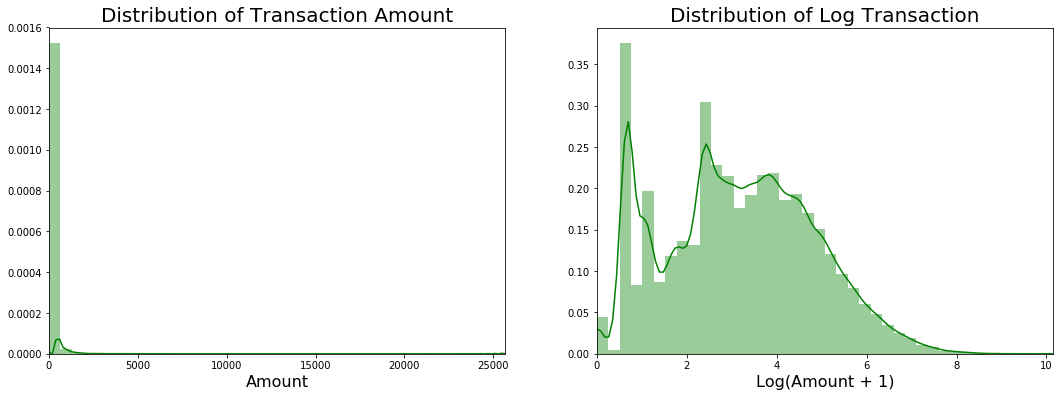

In [6]:
# Distribution of transaction amount

fig, ax = plt.subplots(1, 2, figsize=(18,6))

log_amount = [math.log(x+1) for x in df['Amount']]
log_amount_fraud = [math.log(x+1) for x in df['Amount'][df['Class']==1]]
log_amount_nonfraud = [math.log(x+1) for x in df['Amount'][df['Class']==0]]

sns.distplot(df['Amount'], bins = 40, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=20)
ax[0].set_xlim([min(df['Amount']), max(df['Amount'])])
ax[0].set_xlabel('Amount',fontsize = 16)

sns.distplot(log_amount, bins = 40, ax=ax[1], color='g')
ax[1].set_title('Distribution of Log Transaction', fontsize=20)
ax[1].set_xlim([min(log_amount), max(log_amount)])
ax[1].set_xlabel('Log(Amount + 1)',fontsize = 16)

plt.show()

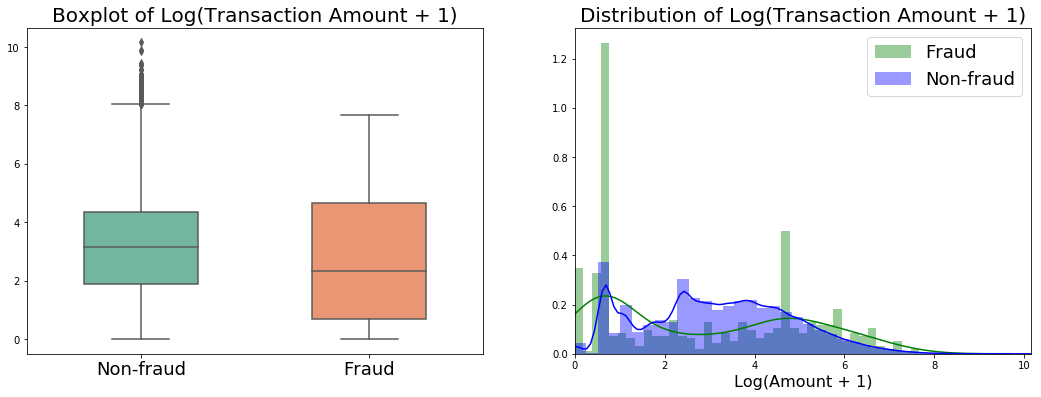

In [7]:
# Fraud vs Amount

fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.boxplot(x = df['Class'], y = log_amount,ax=ax[0], width = 0.5, palette='Set2')
ax[0].set_title('Boxplot of Log(Transaction Amount + 1)', fontsize=20)
ax[0].set_xlabel('')
ax[0].set_xticklabels(['Non-fraud','Fraud'], fontsize =18)


sns.distplot(log_amount_fraud, bins = 40, ax=ax[1], color='green', label = 'Fraud')
sns.distplot(log_amount_nonfraud, bins = 40, ax=ax[1], color='blue', label = 'Non-fraud')
ax[1].set_title('Distribution of Log(Transaction Amount + 1)', fontsize=20)
ax[1].legend(fontsize = 18)
ax[1].set_xlim([min(log_amount), max(log_amount)])
ax[1].set_xlabel('Log(Amount + 1)',fontsize = 16)

plt.show()

In [8]:
bins = [0, 100, 300, 1500, 25691.16]
num_bins = len(bins)-1
df_fraud = df[df['Class']==1]

n, bins, patches = plt.hist(df['Amount'], bins, normed = False, stacked = True, facecolor= '#f26a6a', alpha=0.5)
plt.close()

n_fraud = np.zeros(num_bins)
num_transaction_fraud = len(df_fraud)
for i in range(num_bins):
    for j in range(num_transaction_fraud):
        if bins[i] < df_fraud['Amount'].iloc[j] <= bins[i+1]:
            n_fraud[i] += 1

range_amount = []
for i in range(num_bins):
    lower_lim, higher_lim = str(int(bins[i])), str(int(bins[i+1]))
    range_amount.append("$ " + lower_lim + " ~ " + higher_lim )
    
df_hist = pd.DataFrame(index = range_amount)
df_hist.index.name = 'Transaction Amount[$]'
df_hist['# Total'] = n
df_hist['# Fraud'] = n_fraud
df_hist['# Non-fraud'] = df_hist['# Total'] - df_hist['# Fraud']
df_hist['% Fraud'] = (df_hist['# Fraud'] / df_hist['# Total'] * 100).round(2)
df_hist['% Non-fraud'] = (df_hist['# Non-fraud'] / df_hist['# Total'] * 100).round(2)
df_hist[:20]


,# Total,# Fraud,# Non-fraud,% Fraud,% Non-fraud
Transaction Amount[$],,,,,
$ 0 ~ 100,227422.0,335.0,227087.0,0.15,99.85
$ 100 ~ 300,39096.0,67.0,39029.0,0.17,99.83
$ 300 ~ 1500,16939.0,60.0,16879.0,0.35,99.65
$ 1500 ~ 25691,1350.0,3.0,1347.0,0.22,99.78


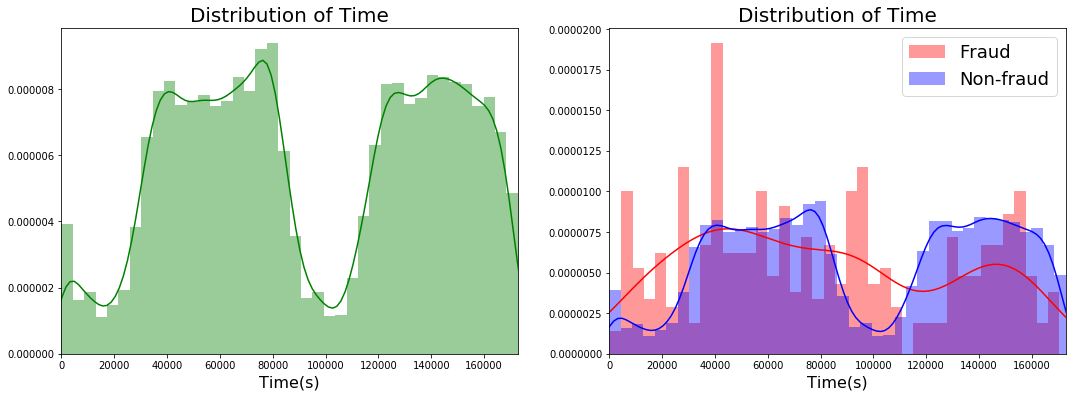

In [9]:
# Distribution of transaction time 
# Fraud vs Time

fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.distplot(df['Time'], bins = 40, ax=ax[0], label = 'Toatl', color='g')
ax[0].set_title('Distribution of Time', fontsize=20)
ax[0].set_xlim([min(df['Time']), max(df['Time'])])
ax[0].set_xlabel('Time(s)',fontsize = 16)

sns.distplot(df['Time'][df['Class']==1], bins = 40, ax=ax[1], label = 'Fraud', color='r')
sns.distplot(df['Time'][df['Class']==0], bins = 40, ax=ax[1], label = 'Non-fraud', color='b')
ax[1].set_title('Distribution of Time', fontsize=20)
ax[1].set_xlim([min(df['Time']), max(df['Time'])])
ax[1].set_xlabel('Time(s)',fontsize = 16)
ax[1].legend(fontsize = 18)

plt.show()

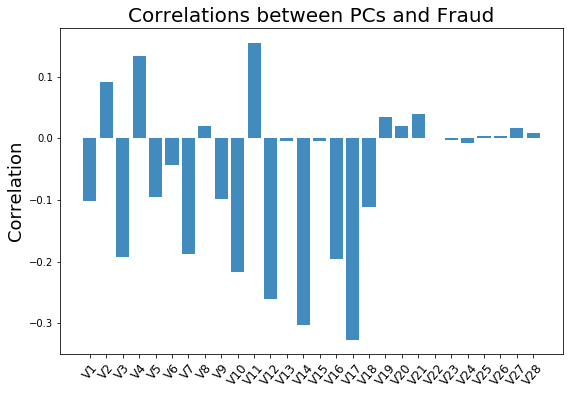

In [10]:
# Fraud vs PCs

pc_names = df.columns[1:29]
cor_matrix = df.corr()
corrs = cor_matrix['Class'][1:29].values
y_pos = np.arange(len(pc_names))

fig, ax = plt.subplots(1, 1, figsize = (9, 6))

plt.bar(y_pos, corrs, align='center', alpha = 0.85)
plt.xticks(y_pos, pc_names)
ax.set_xticklabels(pc_names, rotation = 50, fontsize = 12)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlations between PCs and Fraud', fontsize = 20)

plt.show()

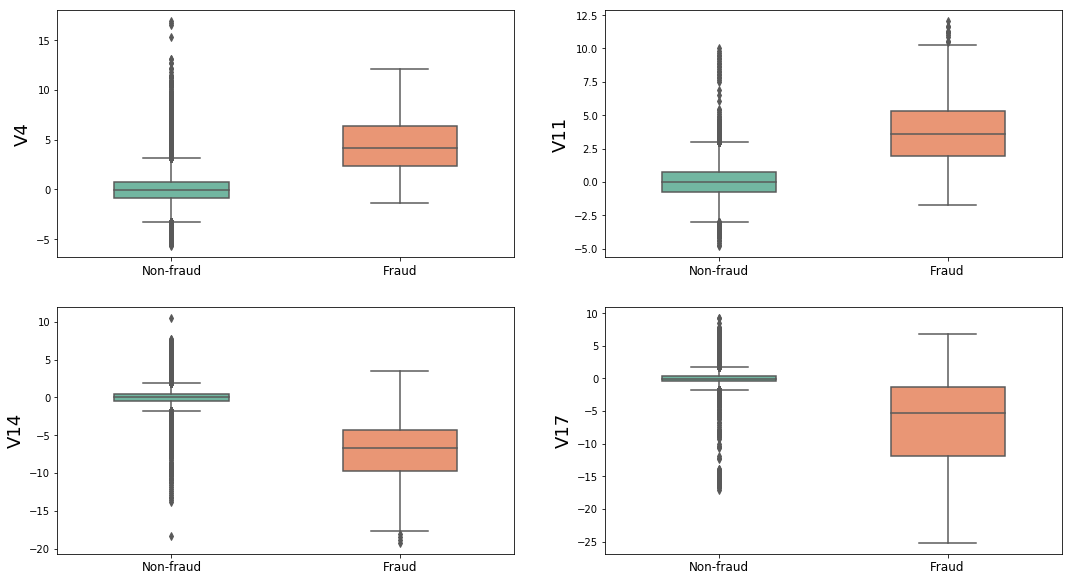

In [13]:
# PC4, PC11, PC14 and PC17 have large absolute values of correlation with fraud 
# PC4, PC11 have positive correlation with fraud, while PC14, PC17 have negative correlation with fraud.

f, ax = plt.subplots(2,2, figsize=(18,10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V4", data=df, palette='Set2', width = 0.5, ax=ax[0][0])
#ax[0][0].set_title('V4 vs Class Negative Correlation')
ax[0][0].set_xlabel('')
ax[0][0].set_ylabel('V4', fontsize = 18)
ax[0][0].set_xticklabels(['Non-fraud','Fraud'], fontsize = 12)

sns.boxplot(x="Class", y="V11", data=df, palette='Set2',width = 0.5,  ax=ax[0][1])
#ax[0][1].set_title('V11 vs Class Negative Correlation')
ax[0][1].set_xlabel('')
ax[0][1].set_ylabel('V11', fontsize = 18)
ax[0][1].set_xticklabels(['Non-fraud','Fraud'], fontsize = 12)

sns.boxplot(x="Class", y="V14", data=df, palette='Set2',width = 0.5,  ax=ax[1][0])
#ax[1][0].set_title('V14 vs Class Negative Correlation')
ax[1][0].set_xlabel('')
ax[1][0].set_ylabel('V14', fontsize = 18)
ax[1][0].set_xticklabels(['Non-fraud','Fraud'], fontsize = 12)

sns.boxplot(x="Class", y="V17", data=df, palette='Set2',width = 0.5,  ax=ax[1][1])
#ax[1][1].set_title('V17 vs Class Negative Correlation')
ax[1][1].set_xlabel('')
ax[1][1].set_ylabel('V17', fontsize = 18)
ax[1][1].set_xticklabels(['Non-fraud','Fraud'], fontsize =12)

plt.show()

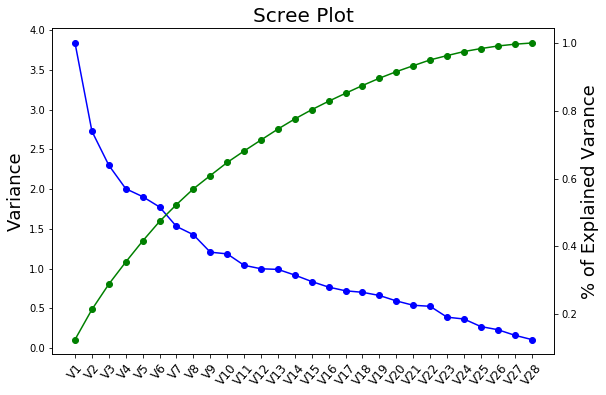

In [11]:
# Scree Plot 
cov_matrix = df.cov().values
pc_table = pd.DataFrame(index = pc_names)
l = []
for i in range(1,29):
    l.append(cov_matrix[i][i])
pc_table['Variance'] = l
pc_table['Cumulative_Percent'] = np.cumsum(l)/sum(l)
pc_table

fig, ax = plt.subplots(1, 1, figsize = (9, 6))

ax1 = ax.twinx()
ax.plot(l, 'b-o')
ax1.plot(pc_table['Cumulative_Percent'].values, 'g-o')

plt.xticks(y_pos, pc_names)
ax.set_xticklabels(pc_names, rotation = 50, fontsize = 12)

ax.set_ylabel('Variance', fontsize = 18)
ax1.set_ylabel('% of Explained Varance', fontsize = 18)
plt.title('Scree Plot', fontsize = 20)
plt.show()